In [1]:
import pandas as pd
from IPython import display

pd.set_option('display.max_columns',500)

# Overview

Perceptrons as Logical Operators. 

Still using a linear learner.  So goal is to divide the space, so follow the outputs of and, or, not.

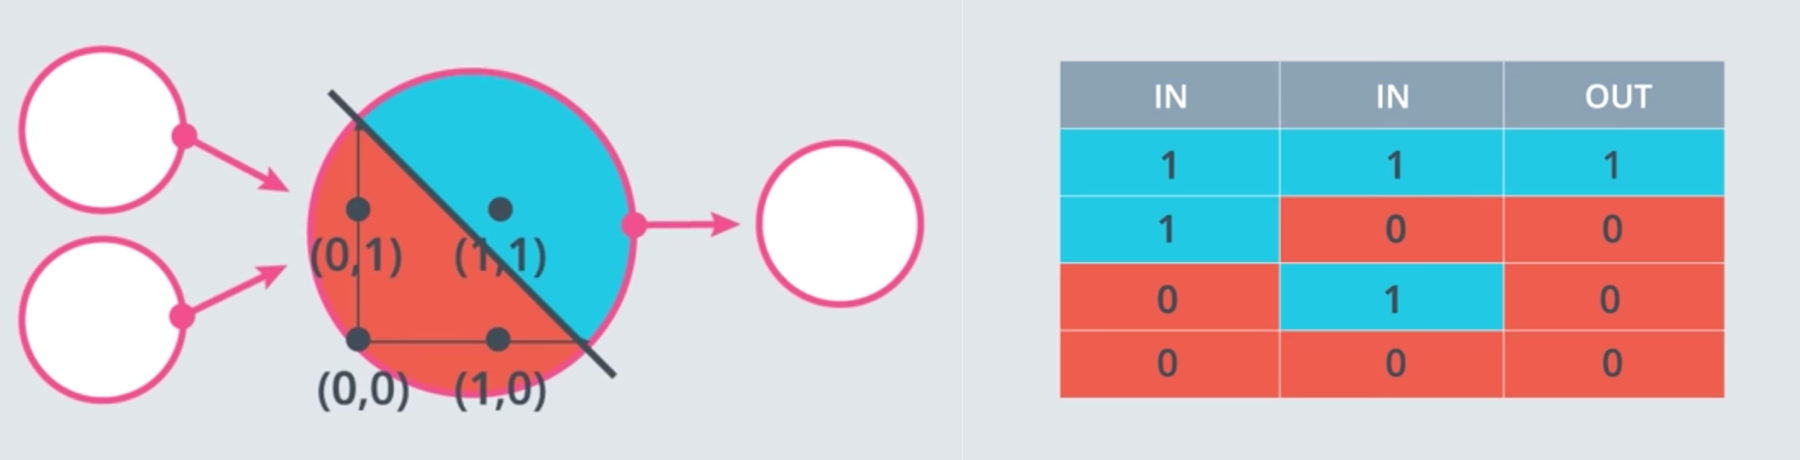

In [2]:
display.Image('./images/perceptrons-as-logical-operators.png')

## Question 1

**What are the weights and bias for the AND perceptron?**

Set the weights (`weight1`, `weight2`) and bias (`bias`) to values that will correctly determine the AND operation as shown above.
More than one set of values will work!  

## Ugochi's Notes

So in this perceptron, we have 3 nodes in layer 1 (weight1, weight2, bias), and the y outcome node. Full equation: w1*X1 + w2*X2 + b*1 = y.  Solve this by system of equations.


### How I solved it

Goal solve for the system of equations

1. Equations
  - w1*(1)+w2*(1)+b = 1 
  - w1*(1)+w2*(0)+b = - 1
  - w1*(0)+w2*(1)+b = - 1
  - w1*(0)+w2*(0)+b = - 1

2. Add the equations
  - 2*w1 + 2*w2 + 4b = -2
  - w1 + w2 + 2b = - 1

3. Solve for w1
  - `w1 = -1 - w2 - 2b`

4. Plug in w1 and solve
  - from step 1(Equation) we know: w1*(1)+w2*(1)+b = 1 
  - plug in w1 (as solved for in step 3) into this equation
  - (-1 - w2 - 2b)*(1) + w2*(1) +b = 1
  - -1 - w2 - 2b + w2 + b = 1
  - -1 - b = 1
  - -b = 2
  - `b = -2`

5. Solve for the relationship between w1 and w2 using step 3
  - w1 = -1 - w2 - 2b
  - w1 = -1 - w2 - (-4)
  - w1 = 3 - w2

6. Insert values
  - if w2 = 1, then w1 = 2  b = -2

  Note, had to make b = -2.1, because zero and above is seen as a positive value, and the output would be 1.

In [3]:
# TODO: Set weight1, weight2, and bias
weight1 = 2
weight2 = 1
bias = -2.1


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -2.1                    0          Yes
       0          1                  -1.1                    0          Yes
       1          0                  -0.1                    0          Yes
       1          1                   0.9                    1          Yes


### Quiz 2: What are two ways to go from an AND perceptron to an OR perceptron?

To move the line up or down, you could decrease the bias (so a translation down) or you can increase the magnitude of both weights so that the line become steeper and seperates the value of (1,1), (0,1), (1,0) from (0,0).


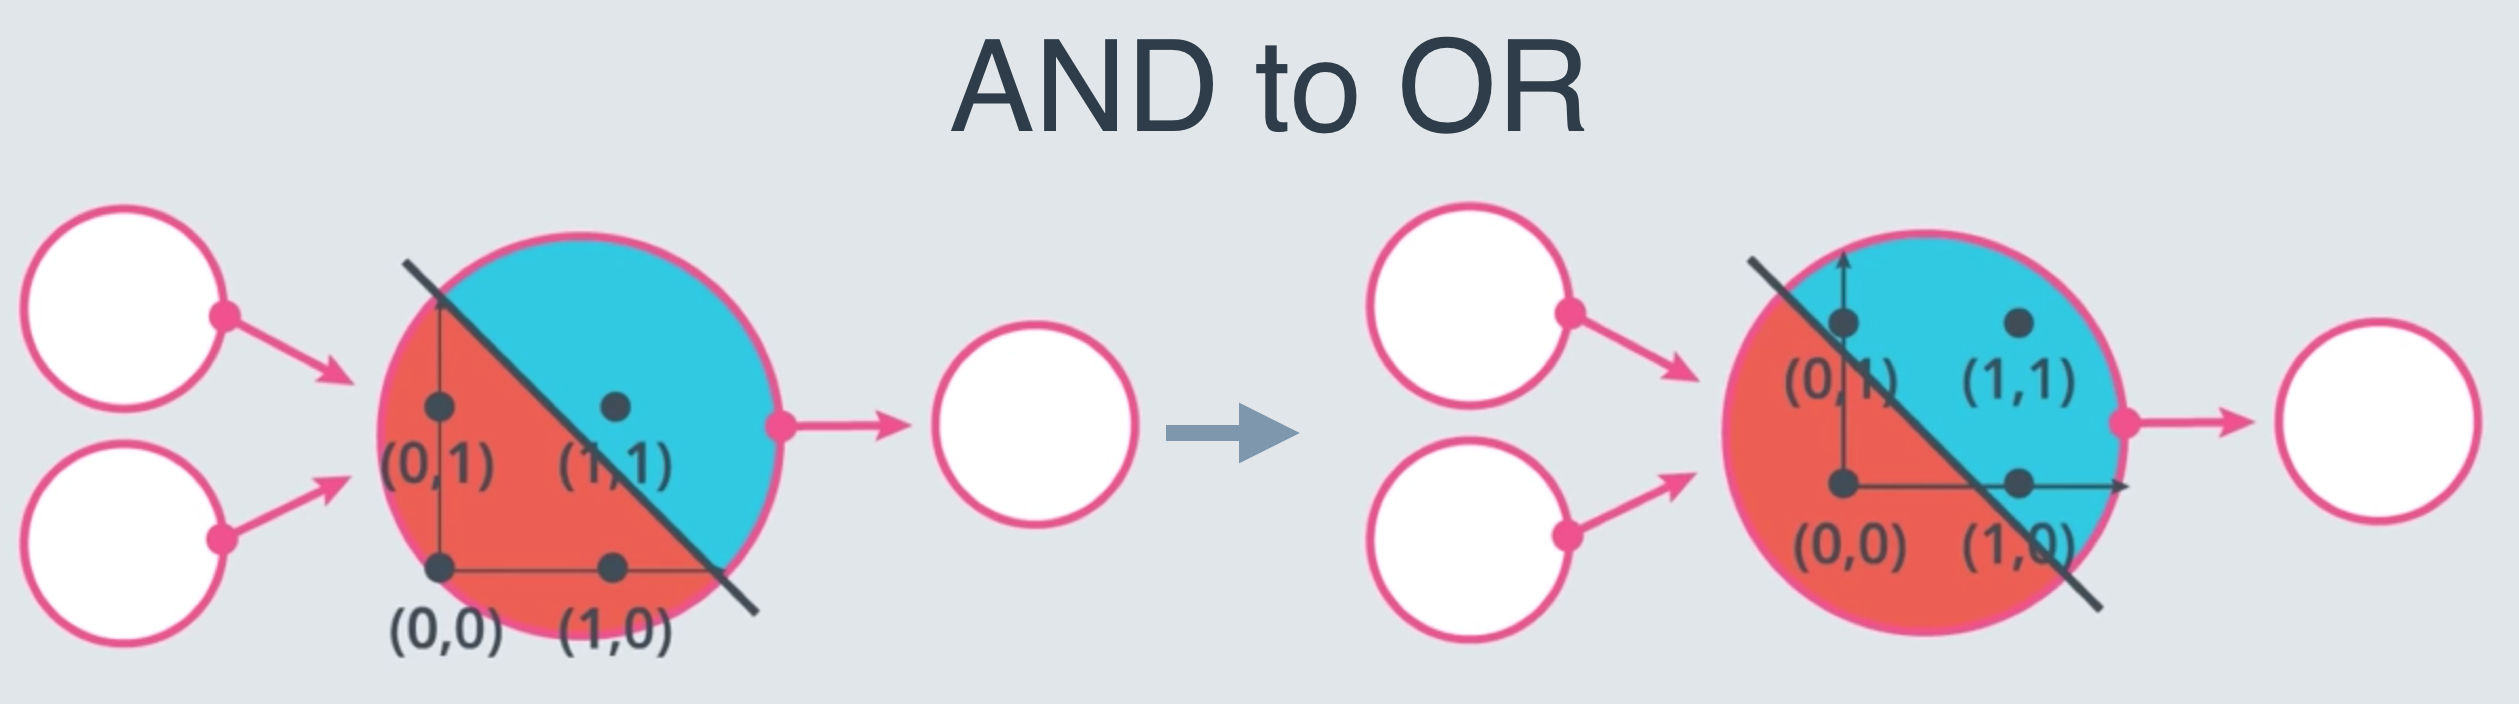

In [4]:
display.Image('./images/perceptron-and-to-or.png')

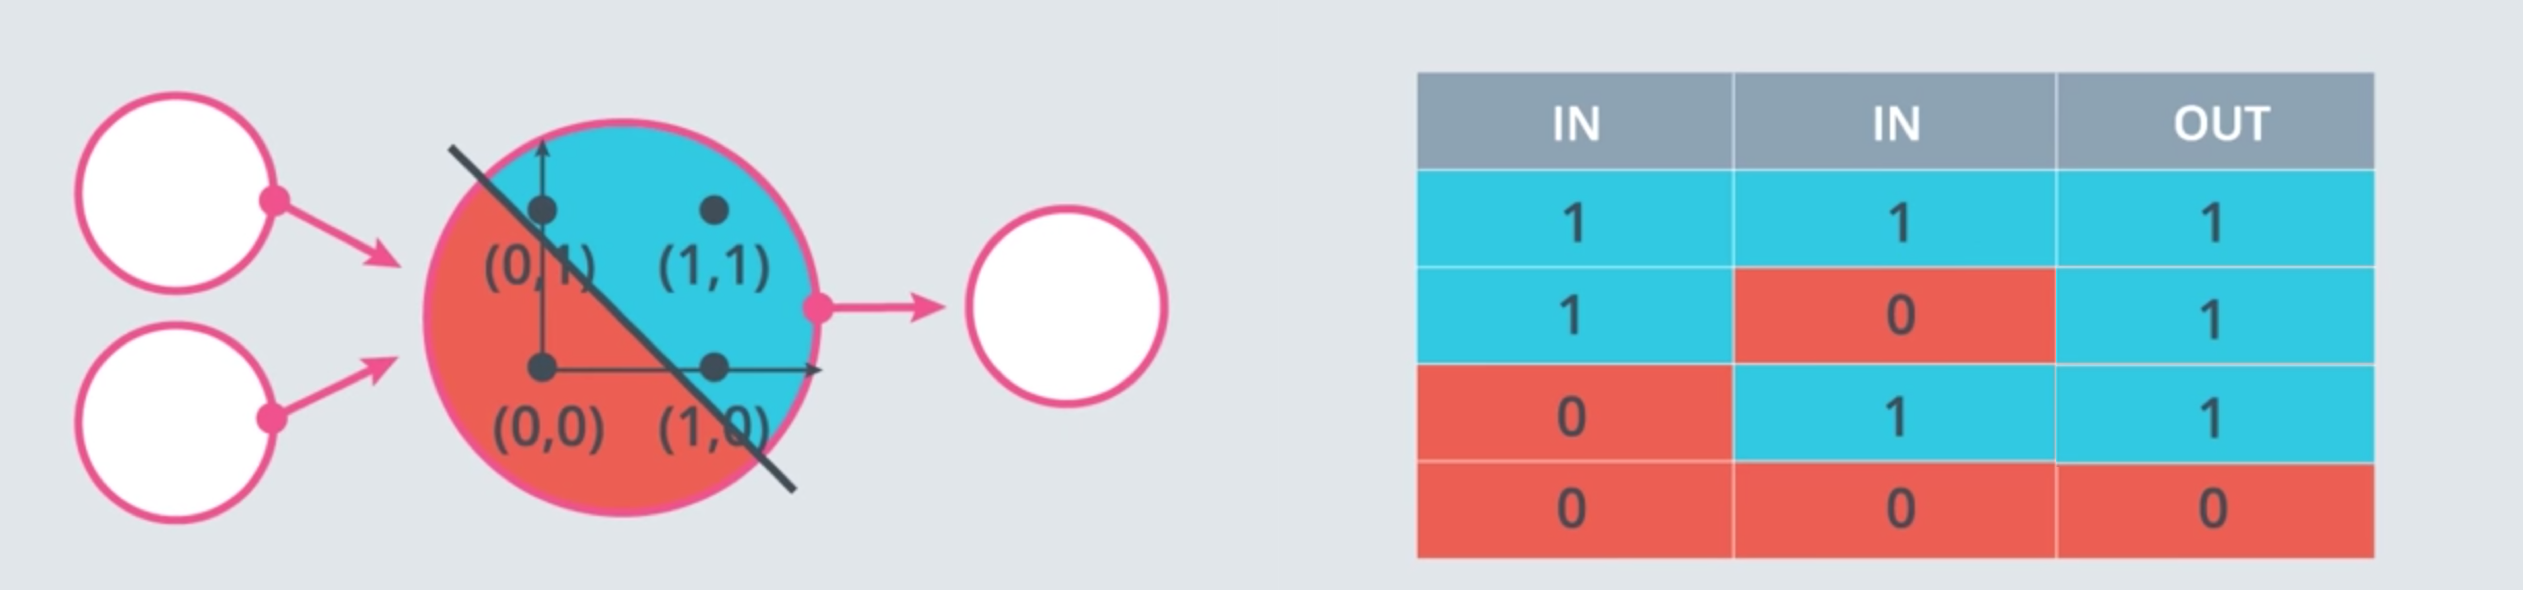

In [5]:
display.Image('./perceptron-or.png')

### Quiz 3: NOT Perceptron

Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a 0 if the input is 1 and a 1 if it's a 0. The other inputs to the perceptron are ignored.

In this quiz, you'll set the weights (weight1, weight2) and bias bias to the values that calculate the NOT operation on the second input and ignores the first input.


Goal solve for the system of equations

If you look at the code it lists out the correct labels (see `correct_outputs`) for the `test_inputs`.

1. Equations based on the correct_outputs for the test_inputs
  - w1*(1)+w2*(1)+b = -1 
  - w1*(1)+w2*(0)+b = 1, which tells us w1 = 0 because b = 1
  - w1*(0)+w2*(1)+b = - 1, which tells us w2 = -2 because b = 1
  - w1*(0)+w2*(0)+b = 1, which tells us b = 1


  Note, had to make b = , because zero and above is seen as a positive value, and the output would be 1.

In [6]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -2.0
bias = 1.0

# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([weight1, test_input[0], weight2, test_input[1], bias, linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[7] for output in outputs if output[7] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Weight 1',' Input 1', ' Weight 2', '  Input 2', '  Bias', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Weight 1   Input 1   Weight 2    Input 2    Bias    Linear Combination    Activation Output   Is Correct
      0.0         0       -2.0          0     1.0                   1.0                    1          Yes
      0.0         0       -2.0          1     1.0                  -1.0                    0          Yes
      0.0         1       -2.0          0     1.0                   1.0                    1          Yes
      0.0         1       -2.0          1     1.0                  -1.0                    0          Yes
